### Titanic Dataset

---

### **1. Loading the Dataset**

To start, we need to download the **Titanic dataset** from Kaggle. For simplicity, we’ll assume the dataset is stored as `train.csv`. If you don’t have it, download it from [Kaggle Titanic dataset](https://www.kaggle.com/c/titanic/data).

In [12]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **2. Data Preprocessing**

In this step, we will clean and preprocess the data:
- Check for missing values.
- Convert categorical variables (like 'Sex', 'Embarked') to numerical values.
- Handle missing data.

In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill missing 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop the 'Cabin' column as it has too many missing values
df = df.drop(columns=['Cabin'])

# Fill missing 'Embarked' with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convert 'Sex' to a numerical value (0 = Female, 1 = Male)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Display the cleaned dataset
df.head()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


### **3. Exploratory Data Analysis (EDA)**

Now let’s explore the dataset to understand its structure and get a sense of the relationships between different variables.

In [4]:
# Get summary statistics of numerical columns
print(df.describe())

# Check the distribution of the target variable 'Survived'
print(df['Survived'].value_counts())


       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000

### **4. Data Visualization**

Now, we will use **Matplotlib** and **Seaborn** to visualize the relationships in the data.


#### 4.1. **Survival Rate by Sex**

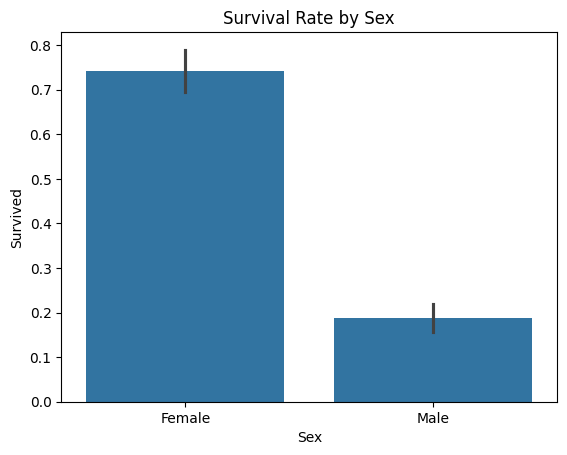

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


#### 4.2. **Survival Rate by Age Group**

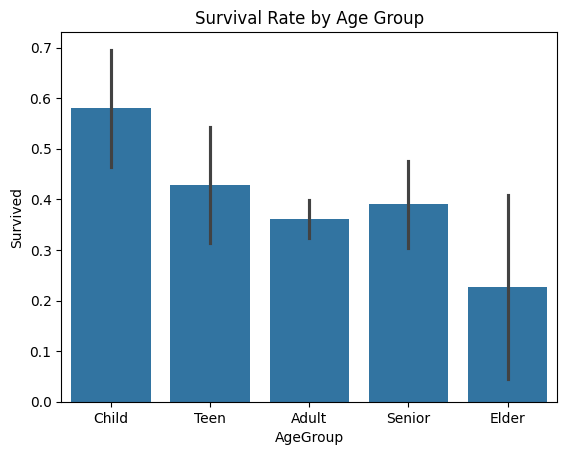

In [6]:
# Create an age group column
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior', 'Elder'])

# Plot survival rate by age group
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()


#### 4.3. **Survival Rate by Pclass**

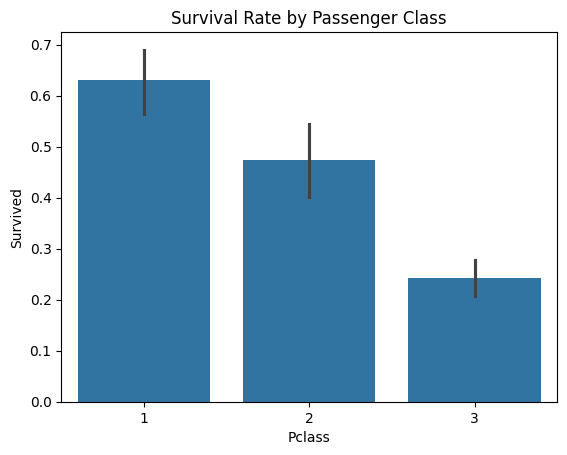

In [7]:
# Plot survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


#### 4.4. **Correlation Heatmap**

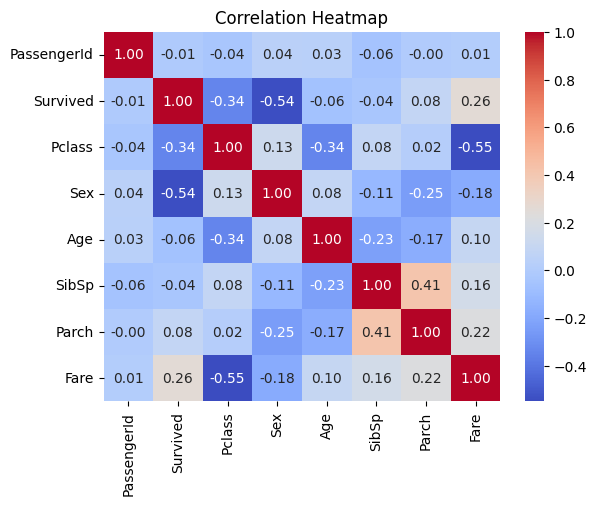

In [10]:
# Select only the numeric columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numerical columns
corr = numerical_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


This heatmap represents the **correlation matrix** between various numerical columns in the Titanic dataset. The color intensity indicates the strength of the correlation between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). The color bar shows how the colors map to correlation values.

Let's break down the correlations seen in the heatmap:

### Key Observations:

1. **Survived and Pclass**:
   - There is a strong negative correlation of **-0.55** between `Survived` and `Pclass`, which indicates that passengers in lower classes (Pclass 3) had a lower survival rate, while passengers in higher classes (Pclass 1) had a higher survival rate.

2. **Sex and Survived**:
   - The correlation between `Survived` and `Sex` is **-0.54**, which suggests that **females** had a higher chance of survival compared to males.

3. **Age and Survived**:
   - The correlation between `Age` and `Survived` is **0.08**, which is very low. This indicates that there is not a strong direct relationship between age and survival, although younger passengers (children) might have had a slightly higher survival rate, as seen in other analyses.

4. **SibSp (Number of Siblings/Spouses) and Survived**:
   - The correlation of **0.41** between `SibSp` (siblings/spouses aboard) and `Survived` suggests that passengers with more siblings/spouses may have had a slightly higher chance of survival. This could be due to the possibility of families being more likely to survive together.

5. **Parch (Number of Parents/Children) and Survived**:
   - Similarly, the correlation of **0.41** between `Parch` (parents/children aboard) and `Survived` suggests a similar trend, where passengers with children or parents had a slightly higher chance of survival.

6. **Fare and Survived**:
   - The correlation between `Fare` and `Survived` is **0.26**, indicating that passengers who paid higher fares (likely in first-class) had a higher chance of survival.

7. **Fare and Pclass**:
   - The negative correlation of **-0.55** between `Fare` and `Pclass` indicates that passengers in lower classes typically paid lower fares.

### Additional Insights:
- **PassengerId** is not strongly correlated with any of the other variables, which is expected as it's simply an identifier for each passenger.
- **Sex** is positively correlated with survival, but since it is a categorical variable encoded as numeric (0 for female, 1 for male), it directly reflects the impact of gender on survival (females had a higher survival rate).

### Color Map:
- **Red** represents positive correlations (closer to 1).
- **Blue** represents negative correlations (closer to -1).
- **Light colors** (close to zero) indicate weak correlations.

---

This heatmap helps us understand relationships between the different features and the survival rate on the Titanic. It's particularly useful for identifying key variables that might contribute to building predictive models (e.g., **Sex**, **Pclass**, **Fare**, etc.).

#### 4.5. **Distribution of Age**

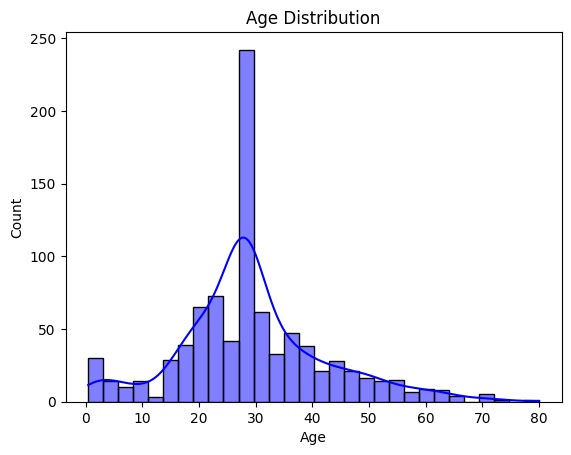

In [9]:
# Plot the distribution of ages
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.show()


This is a **distribution plot** of the **Age** variable from the Titanic dataset. It is a combination of a **histogram** (represented by the bars) and a **kernel density estimate (KDE)** curve (represented by the blue line).

### Explanation of the Chart:

- **X-axis (Age)**: Represents the age of the passengers, ranging from 0 to 80 years.
- **Y-axis (Count)**: Represents the frequency or count of passengers in each age range.

### Key Observations:

1. **Peak at Age 30**:
   - The histogram shows a very sharp peak around **age 30**, indicating that there are many passengers whose age is close to 30 years old. This is the most common age among the Titanic passengers.
   
2. **Age Distribution Shape**:
   - The distribution is **right-skewed** (positively skewed), as there are fewer passengers in the higher age ranges (60+). The curve slowly declines as the age increases.
   
3. **KDE Curve**:
   - The **blue KDE curve** smooths out the histogram to show the overall distribution. It confirms that most passengers were in the younger age group, with a significant concentration around 20-30 years old.
   
4. **Low Count for Older Ages**:
   - The right tail of the distribution shows a drop in count as the age increases, particularly for passengers older than 60. This is typical for many datasets, as younger people often make up a larger portion of a population.

5. **Count of Children and Infants**:
   - There seems to be a lower number of children (infants or very young people), visible in the lower end of the x-axis (close to age 0).

### Insights:
- The majority of Titanic passengers were relatively young, with many in their 20s and 30s.
- The distribution's skew suggests that the dataset includes fewer older passengers.
  
This plot is useful for understanding the **age demographics** of Titanic passengers and provides insights into how age might correlate with survival or other variables.

### **5. Data Analysis and Insights**

After visualizing the data, we can derive some insights:

- **Sex and Survival Rate**: Females had a higher survival rate compared to males.
- **Age and Survival Rate**: Children and seniors had higher survival rates compared to adults.
- **Passenger Class and Survival**: First-class passengers had a higher survival rate compared to second and third-class passengers.
- **Embarked Location**: Passengers who embarked from 'C' (Cherbourg) had a higher survival rate than those from 'Q' (Queenstown) and 'S' (Southampton).

### **Final Thoughts**

With this analysis, we can move forward to build predictive models for Titanic survival (for example, using **Logistic Regression** or **Random Forests**) or further explore the dataset in other ways.

### Summary of the Project

- **NumPy**: Used for numerical data processing (e.g., filling missing values with the median).
- **Pandas**: Used for loading, cleaning, and manipulating the dataset.
- **Matplotlib** and **Seaborn**: Used for visualizing patterns and relationships in the data.

This is a full-fledged project where we explored the Titanic dataset and used **NumPy**, **Pandas**, **Matplotlib**, and **Seaborn** to clean, analyze, and visualize the data. Feel free to expand this by building machine learning models or doing more detailed analysis.